#### 연관규칙(apriori) => 가지치기(pruning)

In [ ]:
'''
항목집합
5개 원소 집합 I = {A,B,C,D,E}
5개 원소 부분집합 I : 2^5-1 = 31개 부분집합 소유.

데이터 마이닝
빈발: frequent
'''

In [9]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
# TransactionEncoder: 길이가 일정치 않은 거래데이터를 머신러닝 하기에 적절한 형태의 배열로 변환해주는 클래스

In [7]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [14]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [21]:
te_array = te_array.astype(int)

In [19]:
col = te.columns_

In [22]:
pd.DataFrame(te_array, columns = col)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,1,0,1,1,0,1
1,1,0,1,0,0,1
2,1,0,1,0,0,0
3,1,1,0,0,0,0
4,0,0,1,1,1,1
5,0,0,1,0,1,1
6,0,0,1,0,1,0
7,1,1,0,0,0,0


In [24]:
te.inverse_transform(te_array)

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [25]:
dataset = [['사과','치즈','생수'],
          ['생수','딸기','치즈','고등어'],
          ['수박','사과','생수'],
          ['생수','딸기','치즈','감자']]

In [30]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array
te_array = te_array.astype(int)
col = te.columns_
df = pd.DataFrame(te_array, columns = col)

In [40]:
#빈발 항목 집합
freq_itemsets = apriori(df,min_support=0.5, use_colnames=True)
freq_itemsets

# 고등어를 포함하면 비빈발 항목 집합임.

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(생수, 딸기)"
5,0.50,"(딸기, 치즈)"
6,0.50,"(생수, 사과)"
7,0.75,"(생수, 치즈)"
8,0.50,"(생수, 딸기, 치즈)"


In [41]:
### threshold: 임계값? 정규값?
from mlxtend.frequent_patterns import association_rules
association_rules(freq_itemsets, metric = 'confidence', min_threshold=0.3)
# lift 1 이상만 보자.
# 뭔가 분명한 기준이 더 있어야할 것 같긴 함.
# conviction: Y없이 X가 발생한 비율(찾아낸 규칙이 얼마나 잘못되었나?)
#             규칙에 대해 얼마나 확신할 수 있느냐는 척도?
# conv(X->Y)= (1-s(Y)) / (1-c(X->Y))
# conv(X->Y): Y가 발생되지 않은 비율이 X가 발생된 것 중 Y와 동시에 일어나지 않은 사건의 비율의 몇 배?
# 1-s(Y): Y가 발생하지 않은 비율

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(생수, 딸기)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(생수, 치즈)",(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


In [43]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [45]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array
te_array = te_array.astype(int)
col = te.columns_
df = pd.DataFrame(te_array, columns = col)

In [46]:
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,1,1,1,1,0,1
1,0,0,1,1,0,1,0,1,1,0,1
2,1,0,0,1,0,1,1,0,0,0,0
3,0,1,0,0,0,1,1,0,0,1,1
4,0,1,0,1,1,1,0,0,1,0,0


In [49]:
freq_itemsets = apriori(df,min_support=0.6, use_colnames=True)
freq_itemsets


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [57]:
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))

In [58]:
freq_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [65]:
freq_itemsets[(freq_itemsets['length'] == 2) & (freq_itemsets['support'] >= 0.8)] 

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [68]:
freq_itemsets[freq_itemsets['itemsets'] == {'Eggs', 'Onion'}]

,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


In [71]:
# Sparse 형태로 표현하여 메모리 낭비 최소화!
ohtArray = te.fit(dataset).transform(dataset, sparse = True)
ohtArray

<5x11 sparse matrix of type '<class 'numpy.bool_'>'
	with 26 stored elements in Compressed Sparse Row format>

In [73]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(ohtArray,columns = te.columns_)
sparse_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [75]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
data.shape

(7501, 20)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [79]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7081,chicken,whole wheat rice,ham,french fries,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,mineral water,olive oil,gums,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,whole wheat pasta,butter,gums,cereals,body spray,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2287,fresh tuna,red wine,spaghetti,mineral water,soup,bacon,pancakes,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3611,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1549,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5566,vegetables mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5879,grated cheese,ground beef,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6184,burgers,cake,french fries,hot dogs,low fat yogurt,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
import matplotlib.pyplot as plt
import seaborn as nsn
from wordcloud import WordCloud

In [113]:
plt.rcParams['figure.figsize']=(15,15) # 그림 크기 (가로, 세로) 인치 단위로
wordcloud = WordCloud(background_color='white', width=1200, height = 1200, max_words = 120).generate(str(data[0]))

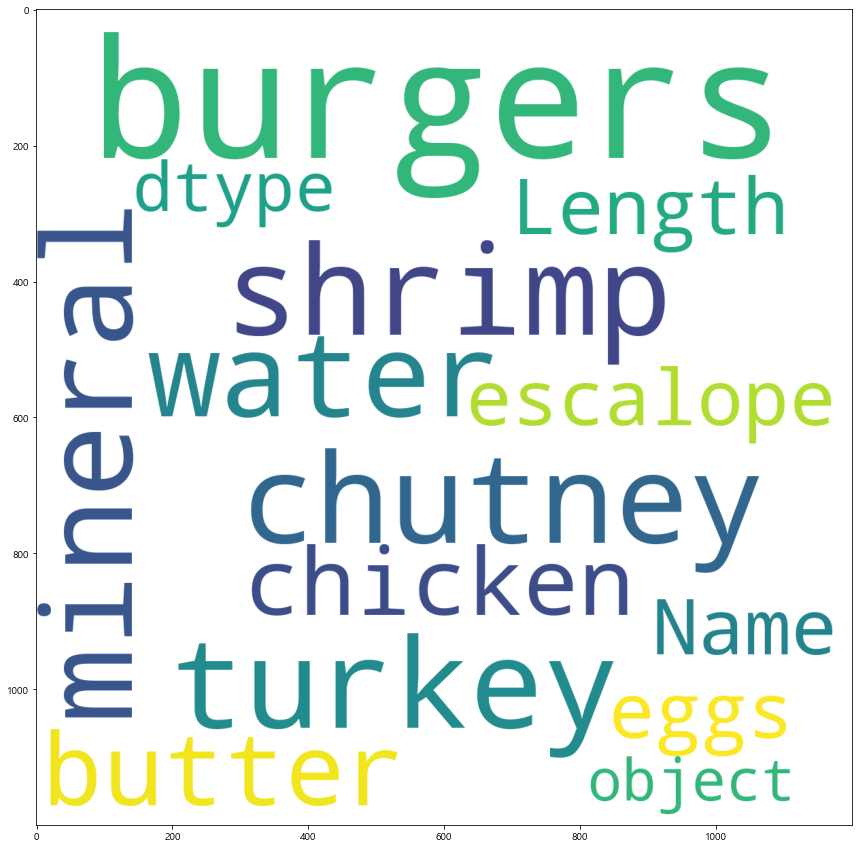

In [114]:
plt.imshow(wordcloud)

In [86]:
data[0].value_counts()

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
shampoo                1
oatmeal                1
cream                  1
corn                   1
cauliflower            1
Name: 0, Length: 115, dtype: int64

In [87]:
data[0].value_counts().head(30)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
green tea             97
whole wheat pasta     95
pancakes              80
soup                  78
muffins               69
energy bar            67
olive oil             67
champagne             64
pepper                61
avocado               57
Name: 0, dtype: int64

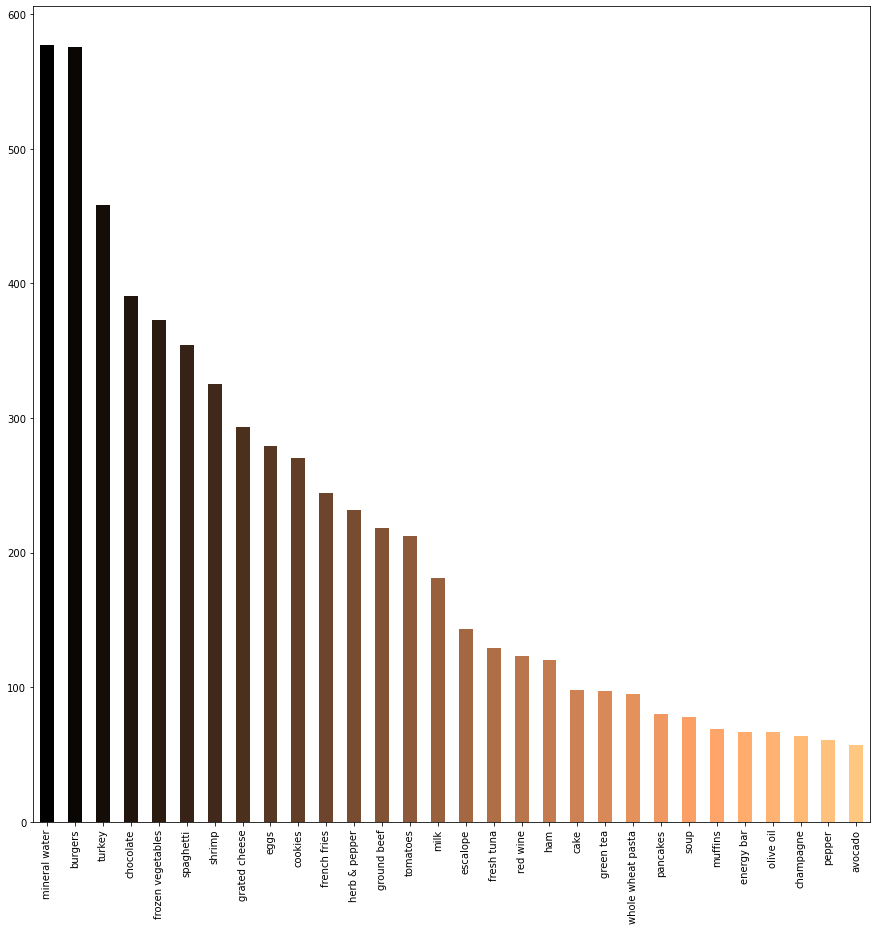

In [90]:
data[0].value_counts().head(30).plot.bar(color = plt.cm.copper(np.linspace(0,1,30)))

In [ ]:
'''
groceries.csv
market.csv
연관규칙(지지도, 신뢰도, 향상도)
# 의미있는 번들상품 아이템 검색!
# 특정 고객에게 홍보하기

'''

In [106]:
import matplotlib.pyplot as plt
import seaborn as nsn
import re
import jpype
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from konlpy.tag import Kkma
from matplotlib import font_manager, rc
from collections import Counter

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [112]:
words = []
with open('kakaotalk.txt','r',encoding='utf-8') as f:
    for line in f:
        m = re.search(r"^\[(.+\]?)\[\w+.\d\d:\d\d\]\s*.+$",line)
        
        if m:
            words.extend(re.split(r"\s+", m.group(1)))
for word, freq in Counter(words).most_common(10):
    print("{0:10s}:{1:3d}".format(word,freq))

          :13095
L7]       :8582
머갈띠       :3481
조원우]      :2063
김상일       :1828
한병현       :1659
L7        :1356
전영하]      :1356
박성채]      :1094
고유순       :970
